In [1]:
%matplotlib inline

In [2]:
#Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Load in CSV
pyber_ride_df =pd.read_csv("Resources/PyBer_ride_data.csv")

In [3]:
pyber_ride_df

,Month,Avg. Fare ($USD)
0,Jan,10.02
1,Feb,23.24
2,Mar,39.20
3,April,35.42
4,May,32.34
5,June,27.04
6,July,43.82
7,Aug,10.56
8,Sept,11.85
9,Oct,27.90


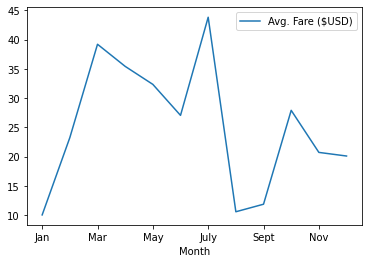

In [4]:
pyber_ride_df.plot(x="Month",y = "Avg. Fare ($USD)")
plt.show()

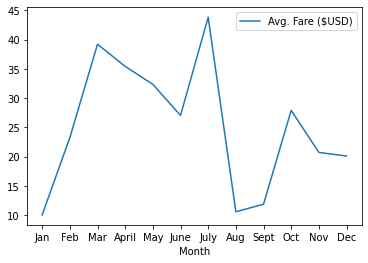

In [5]:
#Set x-axis and tick location
x_axis = np.arange(len(pyber_ride_df))
tick_locations = [value for value in x_axis]

#Plot the data
pyber_ride_df.plot(x="Month", y = "Avg. Fare ($USD)") 
plt.xticks(tick_locations, pyber_ride_df["Month"])
plt.show()

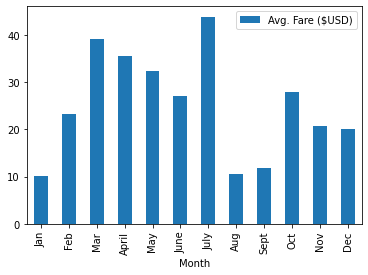

In [6]:
pyber_ride_df.plot.bar(x="Month", y="Avg. Fare ($USD)")
plt.show()

# pyber_ride_df.plot.bar(x="Month", y="Avg. Fare ($USD)")
# plt.show()

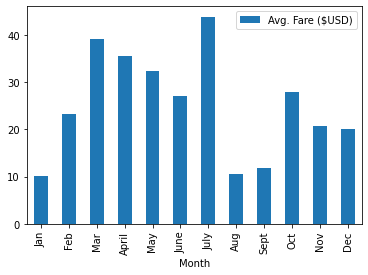

In [7]:
pyber_ride_df.plot(x="Month", y="Avg. Fare ($USD)", kind ='bar')
plt.show()

In [8]:
import statistics
y_axis = [10.02, 23.24, 39.20, 35.42, 32.34, 27.04, 43.82, 10.56, 11.85, 27.90, 20.71, 20.09]
stdev = statistics.stdev(y_axis)
stdev

11.208367917035753

<BarContainer object of 12 artists>

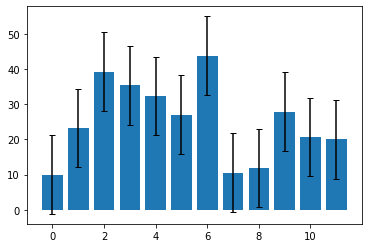

In [9]:
plt.bar(x_axis, y_axis, yerr=stdev, capsize=3)

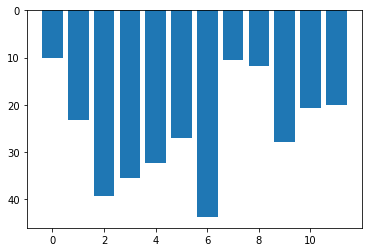

In [10]:
plt.bar(x_axis, y_axis) 
plt.gca().invert_yaxis()

In [11]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [12]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [13]:
#Read the ride data file and store in a df
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df


,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12
...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550370e+12
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.018730e+12
2372,North Jaime,2/10/2019 21:03,11.11,2.781340e+12
2373,West Heather,5/7/2019 19:22,44.94,4.256850e+12


In [14]:
#Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [15]:
# Get the columns and the rows that are not null. (Same as above)
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [16]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [17]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [18]:
# Get the number of data points from the Urban cities .
sum(city_data_df["type"]=="Urban")


66

In [19]:
#number of data points from Suburban
sum(city_data_df["type"]=="Suburban")


36

In [20]:
#number of data points from Rural
sum(city_data_df["type"]=="Rural")

18

In [21]:
# Get the columns and the rows that are not null.Ride data
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [22]:
#not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [23]:
#Find data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [27]:
#Merge data frames using this syntax : new_df = pd.merge(leftdf, rightdf, how=mergetype, on=["columnname left","columnname right"'])
pyber_data_df = pd.merge( ride_data_df,city_data_df, how="left", on= ["city","city"])

#Display the dataframe
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [28]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [30]:
# Create the suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,1/27/2019 3:08,27.79,6.653620e+12,11,Suburban
1626,East Kentstad,4/7/2019 19:44,18.75,6.575960e+12,20,Suburban
1627,Lake Omar,1/17/2019 21:33,21.71,9.669120e+11,22,Suburban
1628,Myersshire,2/27/2019 17:38,17.10,5.706770e+12,19,Suburban
1629,West Hannah,4/19/2019 1:06,37.78,2.273050e+12,12,Suburban


In [31]:
# Create the Rural city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2019 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4.018030e+12,2,Rural


In [33]:
#Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()


city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [34]:
#Get the number of rides for suburban cities.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()


city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [35]:
#Get the number of rides for rural cities.
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()


city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [36]:
#Get the average city fare for urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()


city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [37]:
#Get the average city fare for suburban cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [38]:
#Get the average city fare for rural cities.
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [39]:
#Get the average number of drivers for urban cities.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [40]:
#Get the average number of drivers for suburban cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [41]:
#Get the average number of drivers for rural cities.
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

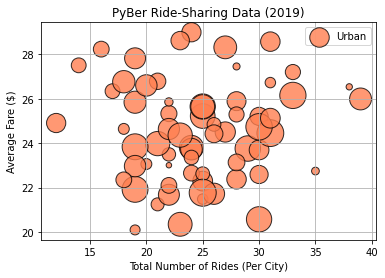

In [47]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add a legend
plt.legend()

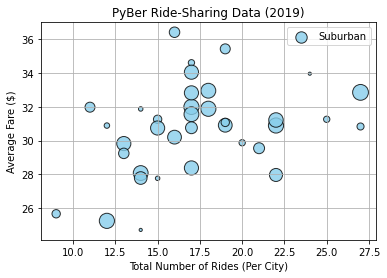

In [48]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add a legend
plt.legend()

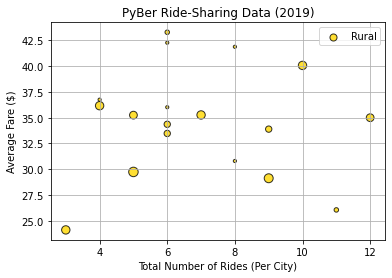

In [50]:
# Build the scatter plots for rural cities.

plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add a legend
plt.legend()

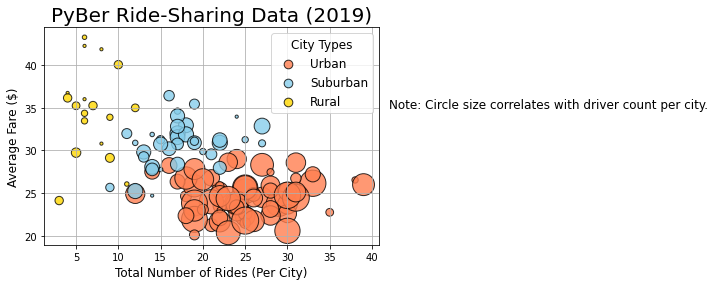

In [55]:
#Add the scatter chars for each type of city. 

plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10*urban_driver_count, c="coral", 
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add a legend
plt.legend()

plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add a legend
plt.legend()

plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Save the figure.
plt.savefig("analysis/Fig1.png")